In [ ]:
import sqlite3
import csv
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt



In [ ]:
#Reading in blood test results
blood_data = pd.read_csv ('clean_blood_test.csv')   
blood_chem_df = pd.DataFrame(blood_data)
blood_chem_df=blood_chem_df.dropna()

In [ ]:
blood_data

,PATNO,YOB,AGE,Prothrombin Time,APTT-QT,Monocytes,Eosinophils,Basophils,Platelets,Neutrophils (%),...,Serum Sodium,Serum Potassium,Serum Bicarbonate,Serum Chloride,Calcium (EDTA),Creatinine (Rate Blanked),ALT (SGPT),AST (SGOT),Urea Nitrogen,Serum Uric Acid
0,3404,1954.0,56.0,10.1,21.0,0.32,0.10,0.02,210.0,64.5,...,138.0,4.1,21.8,99.0,2.40,71.0,22.0,25.0,7.1,178.0
1,3401,1954.0,56.0,10.0,24.8,0.55,0.05,0.02,171.0,61.4,...,136.0,4.2,22.7,100.0,2.37,62.0,17.0,20.0,5.0,262.0
2,3405,1947.0,63.0,10.0,19.8,0.29,0.10,0.06,262.0,35.0,...,140.0,3.9,21.2,104.0,2.54,71.0,14.0,19.0,3.2,339.0
3,3100,1942.0,68.0,10.3,21.9,0.64,0.39,0.05,356.0,65.1,...,131.0,4.4,20.0,93.0,2.27,71.0,32.0,28.0,4.3,238.0
4,3103,1963.0,47.0,10.1,19.5,0.24,0.05,0.03,268.0,55.7,...,137.0,4.2,24.9,100.0,2.47,71.0,31.0,26.0,4.3,232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,3171,1950.0,60.0,11.2,22.5,0.25,0.08,0.01,214.0,49.1,...,135.0,4.2,23.0,98.0,2.42,97.0,24.0,29.0,6.4,410.0
228,3157,1946.0,64.0,10.0,22.8,0.50,0.13,0.02,388.0,64.7,...,139.0,4.3,24.3,101.0,2.42,71.0,22.0,25.0,8.2,309.0
229,3191,1947.0,63.0,10.6,21.8,0.20,0.06,0.05,229.0,53.8,...,143.0,3.9,26.1,101.0,2.37,88.0,23.0,26.0,4.3,250.0
230,3172,1942.0,68.0,10.8,25.1,0.41,0.07,0.03,234.0,67.2,...,133.0,3.8,20.7,100.0,2.27,71.0,22.0,21.0,4.6,345.0


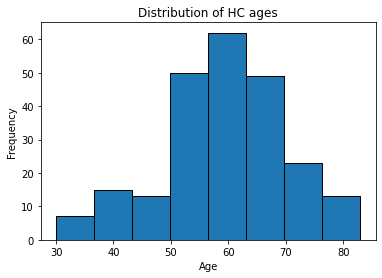

In [ ]:
#Plotting distribution of HC ages
ax=blood_data['AGE'].hist(bins=8,edgecolor='black')
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of HC ages")
ax.grid(False)

### Correlation 

In [ ]:
p_cor=blood_chem_df.corr(method ='pearson') 
S=p_cor['AGE'].dropna()
#Order of correlations by magnitude
order = S.abs().sort_values(ascending = False)
S[order.index]


AGE                          1.000000
YOB                         -1.000000
Urea Nitrogen                0.298034
Lymphocytes (%)             -0.255166
Neutrophils (%)              0.197271
Monocytes                    0.180632
Creatinine (Rate Blanked)    0.180316
Alkaline Phosphatase-QT      0.178899
Lymphocytes                 -0.161696
Total Protein               -0.159974
Monocytes (%)                0.158007
Serum Uric Acid              0.128502
Basophils                    0.123712
Albumin-QT                  -0.122841
Neutrophils                  0.113783
Platelets                   -0.099442
AST (SGOT)                   0.095477
Serum Glucose                0.089607
Basophils (%)                0.082415
Serum Potassium              0.078685
PATNO                        0.074955
WBC                          0.053332
Serum Chloride              -0.048654
ALT (SGPT)                   0.046626
Total Bilirubin              0.040457
Serum Sodium                 0.030841
Prothrombin 

### Logistic Regression

In [ ]:
#Top 8 most highly correlated w. age (drop year and age)
order.index[2:10]

Index(['Urea Nitrogen', 'Lymphocytes (%)', 'Neutrophils (%)', 'Monocytes',
       'Creatinine (Rate Blanked)', 'Alkaline Phosphatase-QT', 'Lymphocytes',
       'Total Protein'],
      dtype='object')

In [ ]:
#X and y values
X = blood_chem_df[order.index[2:10]]
y = blood_chem_df['AGE']

In [ ]:
X

,Urea Nitrogen,Lymphocytes (%),Neutrophils (%),Monocytes,Creatinine (Rate Blanked),Alkaline Phosphatase-QT,Lymphocytes,Total Protein
0,7.1,28.1,64.5,0.32,71.0,74.0,1.69,73.0
1,5.0,28.5,61.4,0.55,62.0,68.0,1.78,71.0
2,3.2,58.9,35.0,0.29,71.0,64.0,4.29,77.0
3,4.3,21.4,65.1,0.64,71.0,86.0,1.73,67.0
4,4.3,39.4,55.7,0.24,71.0,69.0,2.58,72.0
...,...,...,...,...,...,...,...,...
227,6.4,40.5,49.1,0.25,97.0,72.0,1.26,68.0
228,8.2,25.4,64.7,0.50,71.0,97.0,2.23,70.0
229,4.3,38.2,53.8,0.20,88.0,67.0,1.99,70.0
230,4.6,24.5,67.2,0.41,71.0,78.0,1.47,68.0


In [ ]:
#Test-train split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)



In [ ]:
# Fitting w. bias term
logistic_regression= LogisticRegression(fit_intercept=True)
logistic_regression.fit(X_train,y_train)
#Predicting on test set
y_pred=logistic_regression.predict(X_test)
y_pred_train=logistic_regression.predict(X_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy:  0.037037037037037035


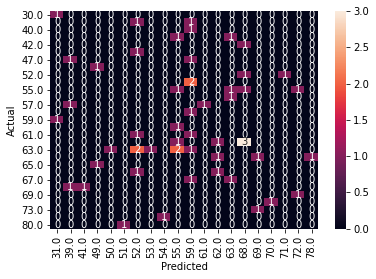

In [ ]:
#Printing confusion matrix and accuracy
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Text(0, 0.5, 'Predicted age')

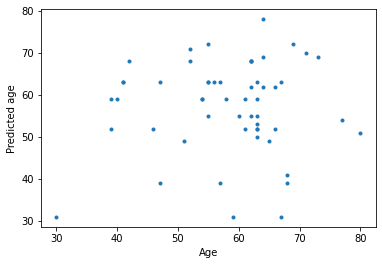

In [ ]:
#Plotting predicted ages vs. actual for test set
plt.plot(y_test,y_pred,'.',label='y vs. y pred')
plt.xlabel('Age')
plt.ylabel('Predicted age')



Text(0, 0.5, 'Predicted age')

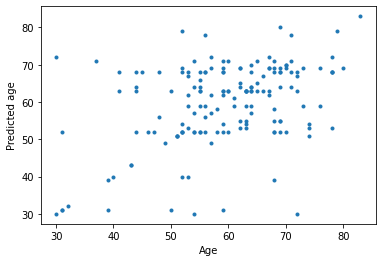

In [ ]:
#Plotting predicted ages vs. actual for train set
plt.plot(y_train,y_pred_train,'.',label='y vs. y pred')
plt.xlabel('Age')
plt.ylabel('Predicted age')

### Non-linear relationships

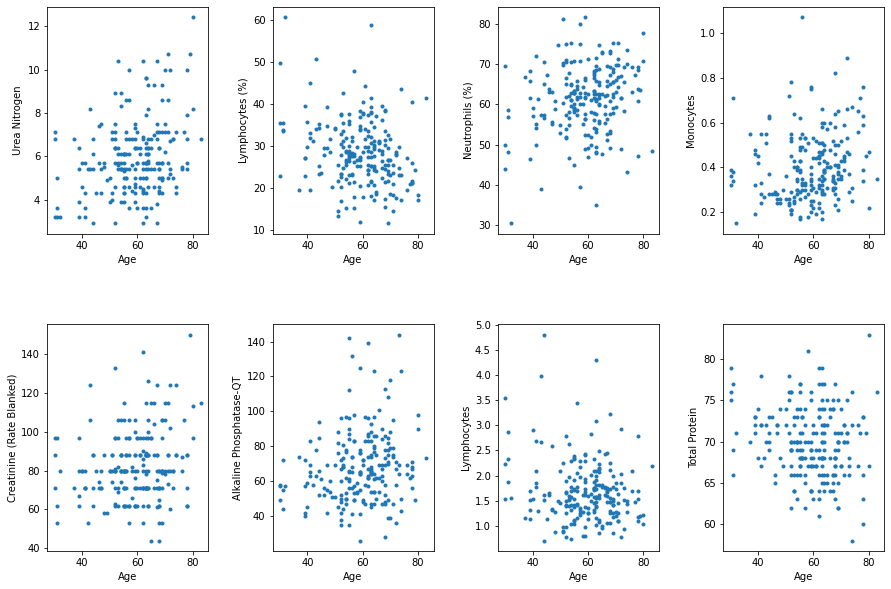

In [ ]:

fig =plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(2,10):
    ax = fig.add_subplot(2, 4, (i-1))
    k = blood_chem_df[order.index[i]]
    ax.plot(y,k,'.',label=str(order.index[i]))
    ax.set_xlabel('Age')
    ax.set_ylabel(str(order.index[i]))






<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b924cd70-4ac3-479b-ad45-f79f559155a8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>